# Student Performance Prediction Models.

## Overall Objective:

This project seeks to implement various machine learning models and determine the best one that predicts student performance based on a performance indexing score obtained from a sample dataset. It also involves data wrangling and ETL operations as well as bried analysis of teh data to extract hidden insights in the dataset.

### Table of Contents:
1. Loading the required libraries.
2. Loading the dataset.
3. Dataset Exploration and ETL Operations.
4. Building the prediction models.
5. Selection of the best model.
6. Other applications of the models.

### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
import sklearn

### Loading the dataset

In [3]:
df = pd.read_csv("D:\Personal Projects 2\Practice Files July 2024\Student_Performance.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_190488\1081087369.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Personal Projects 2\Practice Files July 2024\Student_Performance.csv")


### Exploring the dataset & ETL Operations

In [5]:
## first 5 rows

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
## datatypes in the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
## summary statistics of the dataset

df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
## obtainining more descriptive statistics

num = df.drop(["Extracurricular Activities"], axis = 1)

from scipy.stats import describe

description = describe(num)

for key, values in description._asdict().items():
    print(f"{key} : {values}")

nobs : 10000
minmax : (array([ 1., 40.,  4.,  0., 10.]), array([  9.,  99.,   9.,   9., 100.]))
mean : [ 4.9929 69.4457  6.5306  4.5833 55.2248]
variance : [  6.70452004 300.78493      2.87595124   8.22168328 369.1223772 ]
skewness : [-0.00421188  0.00450101 -0.03946787 -0.03563065 -0.00173977]
kurtosis : [-1.23212798 -1.21323053 -1.25685918 -1.21454927 -0.86069284]


In [13]:
## checking for any null values

num.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [15]:
## checking for any duplicates

num.duplicated().sum()

234

In [17]:
## dropping the duplicated values

z = num.drop_duplicates()

In [19]:
z.shape

(9766, 5)

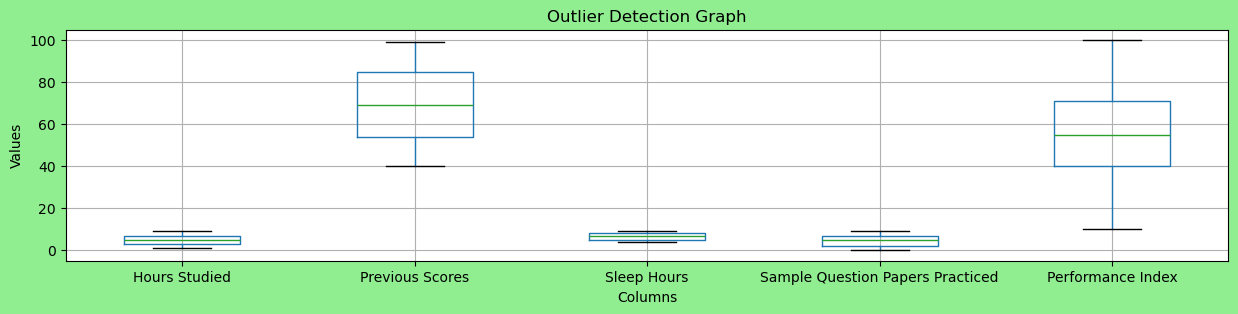

In [23]:
## checking for any outliers

plt.figure(facecolor="lightgreen", figsize = (15,3))
z.boxplot()
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Outlier Detection Graph")
plt.grid(True)
plt.show()

##### The dataset has no outliers

### Building the Performance prediction models.

#### Defining the dependent and independent variables.

In [25]:
X = z.drop(["Performance Index"], axis = 1)
y = z["Performance Index"]

#### Normalizing the dataset

In [107]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

#### Dividing the data into training and testing sets

In [121]:
## dividing the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.25, random_state=10)

#### 1. Linear Regression

In [123]:
## loading the regressor

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [125]:
## fitting the model

lr.fit(X_train, y_train)

LinearRegression()

In [127]:
## investigating the intercept

lr.intercept_

55.306512935792036

In [129]:
## getting the parameters 

lr.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [133]:
## predicting the student performance

pred = lr.predict(X_test)
pred

array([30.51515647, 45.64628238, 66.12254404, ..., 73.64510955,
       51.16966732, 80.93974372])

In [188]:
## metrics 

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_poisson_deviance, accuracy_score

print("R^2:", r2_score(pred, y_test))
print("MAE:", mean_absolute_error(pred, y_test))
print("MAPE:", mean_absolute_percentage_error(pred, y_test))
print("MSE:", mean_squared_error(pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(pred, y_test)))
print("MPE:", mean_poisson_deviance(pred, y_test))

R^2: 0.9879224867681977
MAE: 1.660044182167577
MAPE: 0.03496176979308325
MSE: 4.371248727994629
RMSE: 2.0907531485076447
MPE: 0.0927039060018457


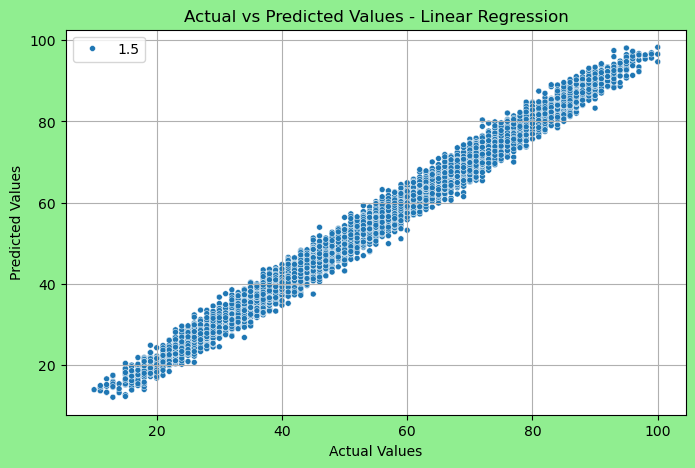

In [137]:
## Plotting the results 

plt.figure(figsize = (8,5), facecolor="lightgreen", edgecolor="darkgrey")
sns.scatterplot(y=pred, x = y_test, markers="x", size=1.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Linear Regression")
plt.grid(True)
plt.show()

##### The model has an accuracy of 98.79% making it a good predictor of Student Performance.

#### 2. Random Forest Regressor

In [139]:
## importing the random forest regressor 

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [141]:
## fitting the model


rf.fit(X_train, y_train)

RandomForestRegressor()

In [143]:
## intecepts

pred_rf = rf.predict(X_test)
pred_rf

array([32.02 , 44.58 , 67.41 , ..., 72.465, 50.13 , 81.35 ])

In [186]:
## metrics

print("R^2:", r2_score(pred_rf, y_test))
print("MAE:", mean_absolute_error(pred_rf, y_test))
print("MAPE:", mean_absolute_percentage_error(pred_rf, y_test))
print("MSE:", mean_squared_error(pred_rf, y_test))
print("RMSE:", np.sqrt(mean_squared_error(pred_rf, y_test)))
print("MPE:", mean_poisson_deviance(pred_rf, y_test))

R^2: 0.9836584154173811
MAE: 1.9354119475594562
MAPE: 0.04060614064079904
MSE: 5.8801804461352445
RMSE: 2.4249083376769613
MPE: 0.1238210218636964


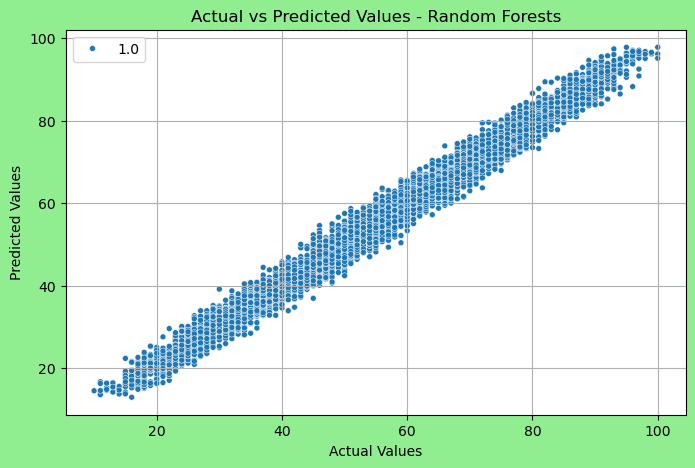

In [147]:
## Plotting the results 

plt.figure(figsize = (8,5), facecolor="lightgreen", edgecolor="darkgrey")
sns.scatterplot(y=pred_rf, x = y_test, markers="^", size=1.0)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Random Forests")
plt.grid(True)
plt.show()

##### The model has an accuracy of 98.39% making it a good predictor of Student Performance.

#### 3. XGBoost Regressor

In [149]:
## loading the XGBoost Regressor

import xgboost

from xgboost import XGBRegressor

xgbr = XGBRegressor()

In [151]:
## fitting the model

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [153]:
## predicting the regressor

xgbr_pred = xgbr.predict(X_test)
xgbr_pred

array([33.781273, 45.12514 , 65.50713 , ..., 73.406906, 49.85305 ,
       80.842834], dtype=float32)

In [184]:
## XGBoost Regressor Metrics

print("R^2:", r2_score(xgbr_pred, y_test))
print("Mean Absolute Error:", mean_absolute_error(xgbr_pred, y_test))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(xgbr_pred, y_test))
print("Mean Squared Error:", mean_squared_error(xgbr_pred, y_test))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(xgbr_pred, y_test)))
print("R-Squared Error:", r2_score(xgbr_pred, y_test))

R^2: 0.983071364583791
Mean Absolute Error: 1.9717349774357402
Mean Absolute Percentage Error: 0.04168923556246648
Mean Squared Error: 6.1295913448266415
Root Mean Squared Error: 2.475801152117561
R-Squared Error: 0.983071364583791


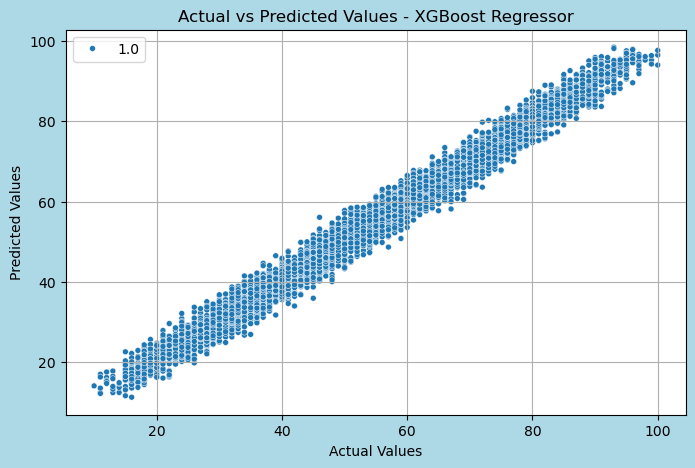

In [157]:
## Plotting the results 

plt.figure(figsize = (8,5), facecolor="lightblue", edgecolor="darkgrey")
sns.scatterplot(y=xgbr_pred, x = y_test, markers="^", size=1.0)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - XGBoost Regressor")
plt.grid(True)
plt.show()

##### The model has an accuracy of 98.31% making it a good predictor of Student Performance.

#### 4. SVM Regressor

In [159]:
## loading the regressor

from sklearn import svm

svmr = svm.SVR()

In [161]:
## fitting the model

svmr.fit(X_train, y_train)

SVR()

In [163]:
## y-intercept

svmr.intercept_

array([55.04736214])

In [165]:
## Predicting the regressor

svmr_pred = svmr.predict(X_test)
svmr_pred

array([31.21471552, 44.79909085, 66.72902788, ..., 73.00527348,
       50.43504149, 80.65450862])

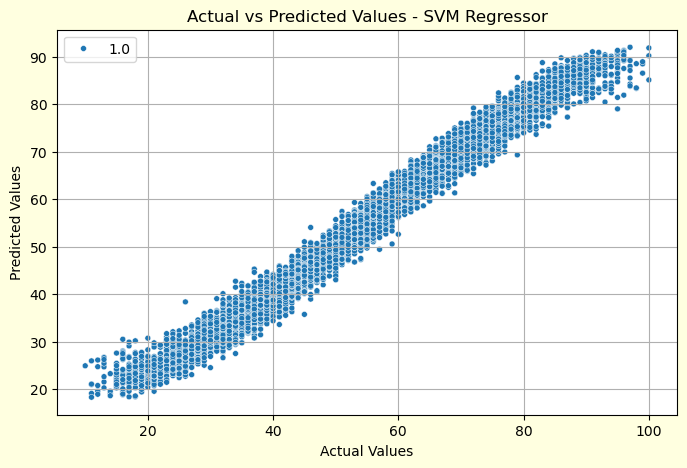

In [173]:
## Plotting the results 

plt.figure(figsize = (8,5), facecolor="lightyellow", edgecolor="darkgrey")
sns.scatterplot(y=svmr_pred, x = y_test, markers="^", size=1.0)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - SVM Regressor")
plt.grid(True)
plt.show()

In [181]:
## SVM Regressor Metrics

print("R^2:", r2_score(svmr_pred, y_test))
print("Mean Absolute Error:", mean_absolute_error(svmr_pred, y_test))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(svmr_pred, y_test))
print("Mean Squared Error:", mean_squared_error(svmr_pred, y_test))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(svmr_pred, y_test)))
print("R-Squared Error:", r2_score(svmr_pred, y_test))

R^2: 0.9751244679800305
Mean Absolute Error: 2.15575069840638
Mean Absolute Percentage Error: 0.046094158677111634
Mean Squared Error: 8.212097838141641
Root Mean Squared Error: 2.865675808276582
R-Squared Error: 0.9751244679800305


##### The model has an accuracy of 97.51% making it a good predictor of Student Performance.

### Selection of the best model.

##### Linear Regression:
The model has the highest accuracy prediction of 98.79%, making it the best predictor of student performance amongst the four models.

### Other Applications of the models.

##### This model can be used in various scenarios like:
1. economic planning analysis in the public sector.
2. HR Department during employee perfomance appraisals.
3. sales inventory management.
4. policy formulations.
5. loan disbursments to customers in financial institutions like banks, SACCOs and FinTechs etc.